In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from scipy.stats import chi2_contingency 
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)


In [32]:
data = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')

In [33]:
data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
59,5.2,2.7,3.9,1.4,Iris-versicolor
36,5.5,3.5,1.3,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
109,7.2,3.6,6.1,2.5,Iris-virginica
30,4.8,3.1,1.6,0.2,Iris-setosa


In [34]:
data.shape

(150, 5)

In [35]:
def summary(df):
    sum = pd.DataFrame(df.dtypes, columns=['dtypes'])
    sum['missing#'] = df.isna().sum().values
    sum['missing%'] = (df.isna().sum().values*100)/len(df)
    sum['uniques'] = df.nunique().values
    sum['count'] = df.count().values
    #sum['skew'] = df.skew().values
    desc = pd.DataFrame(df.describe().T)
    sum['min'] = desc['min']
    sum['max'] = desc['max']
    sum['mean'] = desc['mean']
    return sum

summary(data).style.background_gradient(cmap='twilight_shifted_r')

,dtypes,missing#,missing%,uniques,count,min,max,mean
sepal_length,float64,0,0.000000,35,150,4.300000,7.900000,5.843333
sepal_width,float64,0,0.000000,23,150,2.000000,4.400000,3.054000
petal_length,float64,0,0.000000,43,150,1.000000,6.900000,3.758667
petal_width,float64,0,0.000000,22,150,0.100000,2.500000,1.198667
species,object,0,0.000000,3,150,nan,nan,nan


In [36]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: xlabel='species', ylabel='count'>

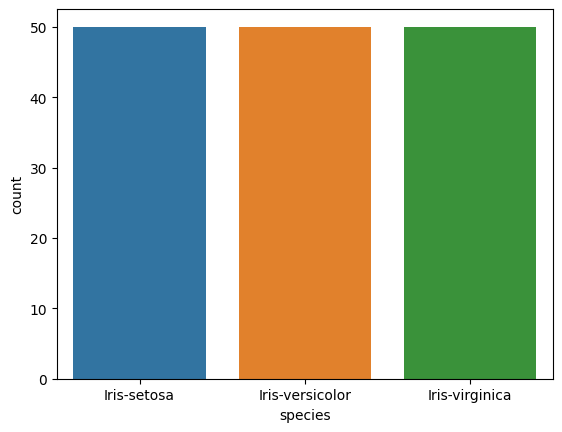

In [37]:
sns.countplot(x =data['species'])

In [38]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [39]:
le = LabelEncoder()
data['species'] = le.fit_transform(data['species'])

In [40]:
y = data['species']
x = data.drop(columns=['species'])

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [42]:
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
ada = AdaBoostClassifier()
knn = KNeighborsClassifier()
lr = LogisticRegression()

In [43]:
dtree.fit(x_train, y_train)
rf.fit(x_train, y_train)
gb.fit(x_train, y_train)
ada.fit(x_train, y_train)
knn.fit(x_train, y_train)
lr.fit(x_train, y_train)

LogisticRegression()

In [44]:
pdtreetr = dtree.predict(x_train)
pdtreete = dtree.predict(x_test)

prftr = rf.predict(x_train)
prfte = rf.predict(x_test)

pgbtr = gb.predict(x_train)
pgbte = gb.predict(x_test)

padatr = ada.predict(x_train)
padate = ada.predict(x_test)

pknntr = knn.predict(x_train)
pknnte = knn.predict(x_test)

plrtr = lr.predict(x_train)
plrte = lr.predict(x_test)

In [45]:
def acc_report(actual,predicted):
    acc_score=accuracy_score(actual,predicted)
    cm_matrix=confusion_matrix(actual,predicted)
    class_rep=classification_report(actual,predicted)
    print('the accuracy of tha model is ',acc_score)
    print(cm_matrix)
    print(class_rep)

In [46]:
print(acc_report(y_train, pdtreetr))
print(acc_report(y_test, pdtreete))

the accuracy of tha model is  1.0
[[37  0  0]
 [ 0 44  0]
 [ 0  0 39]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

None
the accuracy of tha model is  0.9333333333333333
[[13  0  0]
 [ 0  6  0]
 [ 0  2  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.75      1.00      0.86         6
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.92      0.94      0.92        30
weighted avg       0.95      0.93      0.93        30

None


In [47]:
print(acc_report(y_train, prftr))
print(acc_report(y_test, prfte))

the accuracy of tha model is  1.0
[[37  0  0]
 [ 0 44  0]
 [ 0  0 39]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

None
the accuracy of tha model is  0.9666666666666667
[[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92         6
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

None


In [48]:
print(acc_report(y_train, pgbtr))
print(acc_report(y_test, pgbte))

the accuracy of tha model is  1.0
[[37  0  0]
 [ 0 44  0]
 [ 0  0 39]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

None
the accuracy of tha model is  0.9666666666666667
[[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92         6
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

None


In [49]:
print(acc_report(y_train, padatr))
print(acc_report(y_test, padate))

the accuracy of tha model is  0.9583333333333334
[[37  0  0]
 [ 0 42  2]
 [ 0  3 36]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.93      0.95      0.94        44
           2       0.95      0.92      0.94        39

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

None
the accuracy of tha model is  0.9
[[13  0  0]
 [ 0  6  0]
 [ 0  3  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.67      1.00      0.80         6
           2       1.00      0.73      0.84        11

    accuracy                           0.90        30
   macro avg       0.89      0.91      0.88        30
weighted avg       0.93      0.90      0.90        30

None


In [50]:
print(acc_report(y_train, pknntr))
print(acc_report(y_test, pknnte))

the accuracy of tha model is  0.9833333333333333
[[37  0  0]
 [ 0 43  1]
 [ 0  1 38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      0.98      0.98        44
           2       0.97      0.97      0.97        39

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

None
the accuracy of tha model is  0.9666666666666667
[[13  0  0]
 [ 0  5  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.83      0.91         6
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

None


In [51]:
print(acc_report(y_train, plrtr))
print(acc_report(y_test, plrte))

the accuracy of tha model is  0.9833333333333333
[[37  0  0]
 [ 0 43  1]
 [ 0  1 38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      0.98      0.98        44
           2       0.97      0.97      0.97        39

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

None
the accuracy of tha model is  1.0
[[13  0  0]
 [ 0  6  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

None


In [ ]:
!pip install -q gradio

In [ ]:
import gradio as gr

def flower(sepal_length, sepal_width, petal_length, petal_width):
    test = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    result = lr.predict(test)
    results = ['setosa', 'versicolor', 'virginica']
    if result==0:
        return results[0]
    elif result==1:
        return results[1]
    else:
        return results[2]
    

demo = gr.Interface(
    fn=flower,
    inputs=['number','number', 'number', 'number'],
    outputs= ['text']
)
demo.launch()